Example notebook that does stuff with the output files from a xspec, namely:
* the .txt from wdata that saves the data/model,
* the *.fits from writefits that save out the fit parameters.

IGH 06 Oct 2022 - New 2 thermal version based off plot_xspec_thf2prb.ipynb

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.simplefilter('ignore')

# Some useful parameters
# norm = 1e-14/(4piD_A^2)*\int n_e n_p dV
# The norm factor from the XSPEC APEC model is defined here: https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node134.html
kev2mk=0.0861733
emfact=3.5557e-42

In [2]:
# An example file produced from writefits using FPMA and FPMA and a model of const*apec
hdumok = fits.open('mod_th2f2prb.fits')
# hdumok.info()
mokprm=hdumok[1].data
mokcol=hdumok[1].columns.names
hdumok.close()
print(mokcol)

['DIRPATH', 'PHAFILE', 'BACKFILE', 'RESPFILE', 'ARFFILE', 'EXPOSURE', 'STATISTIC', 'kT2', 'EkT2', 'norm5', 'Enorm5', 'kT6', 'EkT6', 'norm9', 'Enorm9', 'factor10', 'Efactor10', 'kT11', 'EkT11', 'Abundanc12', 'EAbundanc12', 'Redshift13', 'ERedshift13', 'norm14', 'Enorm14', 'kT15', 'EkT15', 'Abundanc16', 'EAbundanc16', 'Redshift17', 'ERedshift17', 'norm18', 'Enorm18']


In [3]:
# Need to check the parameter names above as will change when more component are added
# or look back at your xspec script, in our case (T1,EM1=2,5), (T2,EM2=6,9), (C=10)
# 
# The first thermal model might be the cooler or hotter one

t1=mokprm['kt2'][0]/kev2mk
t1_cr=mokprm['ekt2'][0]/kev2mk
print(f'T1: {t1:.2f} MK, Err Rng: {t1_cr[0]:.2f} -- {t1_cr[1]:.2f}')
em1=np.double(mokprm['norm5'][0])/emfact
em1_cr=np.double(mokprm['enorm5'][0])/emfact
print(f'EM1: {em1:.2e} cm^-3, Err Rng: {em1_cr[0]:.2e} -- {em1_cr[1]:.2e}')

t2=mokprm['kt6'][0]/kev2mk
t2_cr=mokprm['ekt6'][0]/kev2mk
print(f'T2: {t2:.2f} MK, Err Rng: {t2_cr[0]:.2f} -- {t2_cr[1]:.2f}')
em2=np.double(mokprm['norm9'][0])/emfact
em2_cr=np.double(mokprm['enorm9'][0])/emfact
print(f'EM2: {em2:.2e} cm^-3, Err Rng: {em2_cr[0]:.2e} -- {em2_cr[1]:.2e}')

fac=mokprm['factor10'][0]
fac_cr=mokprm['efactor10'][0]
print(f'Fac: {fac:.2f} Fac Rng: {fac_cr[0]:.2f} -- {fac_cr[1]:.2f}')

T1: 7.95 MK, Err Rng: 7.13 -- 8.08
EM1: 1.52e+44 cm^-3, Err Rng: 1.16e+44 -- 2.81e+44
T2: 4.08 MK, Err Rng: 4.07 -- 4.10
EM2: 5.83e+46 cm^-3, Err Rng: 5.70e+46 -- 5.95e+46
Fac: 1.06 Fac Rng: 1.06 -- 1.07


In [4]:
# An example file produced from wdata from an iplot ldata ufspec delchi
dd=[]
with open('mod_th2f2prb.txt', 'r') as f:
    lines = f.readlines()
    dd.append(lines)
# Get's rid of the first 3 lines which are normally not the data
dd=dd[0][3:]

In [5]:
print(dd[0])

1.98000002 1.99999809E-2 9687.86328 100.568367 5137.3374 104.461212 5032.87598



In [6]:
# Different plots separated by 'NO NO NO NO NO\n' so need to find where this occurs
# Now two extra data columns as before just one model, but now total model and model comp1 and comp2
# So Split between panels indicator needs two more NO NO over the single model plot
id_break=[i for i, value in enumerate(dd) if value == 'NO NO NO NO NO NO NO\n']

dd_ld=dd[:id_break[0]]
dd_uf=dd[id_break[0]+1:id_break[1]]
dd_dc=dd[id_break[1]+1:]

# For this example just assign the ldata plot
eng_ld=[]
deng_ld=[]
data_ld=[]
edata_ld=[]
mod_ld=[]
mod1_ld=[]
mod2_ld=[]
for i in dd_ld:
    temp_ld=i.split()
    eng_ld.append(float(temp_ld[0]))
    deng_ld.append(float(temp_ld[1]))
    data_ld.append(float(temp_ld[2]))
    edata_ld.append(float(temp_ld[3]))
    mod_ld.append(float(temp_ld[4]))
    mod1_ld.append(float(temp_ld[5]))
    mod2_ld.append(float(temp_ld[6]))
    
eng_ld=np.array(eng_ld)
deng_ld=np.array(deng_ld)
data_ld=np.array(data_ld)
edata_ld=np.array(edata_ld)
mod_ld=np.array(mod_ld)
mod1_ld=np.array(mod1_ld)
mod2_ld=np.array(mod2_ld)


In [7]:
# # Setup the font used for plotting
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['mathtext.default']="regular"

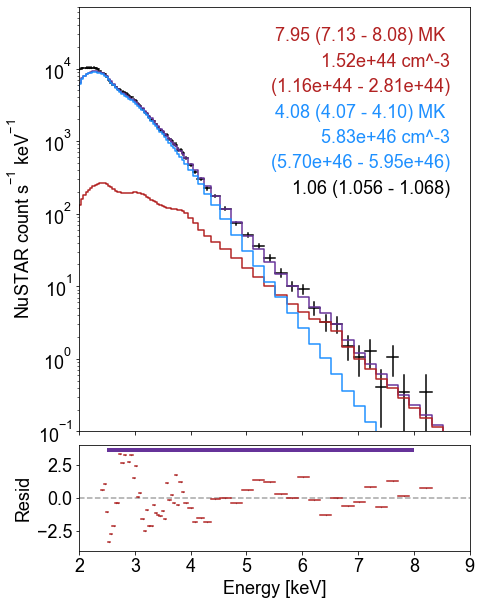

In [11]:
# A lot of this is just to get the plot exactly how I want it 

fig,axs=plt.subplots(2,1,figsize=(7,10),gridspec_kw=dict( height_ratios=[4,1],hspace=0.05))

#  Plot the data and model fit on the top plot
axs[0].semilogy(eng_ld,data_ld,'.',ms=0.5,color='k')
for i in np.arange(len(data_ld)):
    axs[0].plot([eng_ld[i],eng_ld[i]],[data_ld[i]-edata_ld[i],data_ld[i]+edata_ld[i]],color='k')
    axs[0].plot([eng_ld[i]-deng_ld[i],eng_ld[i]+deng_ld[i]],[data_ld[i],data_ld[i]],color='k')
axs[0].plot(eng_ld,mod_ld,color='rebeccapurple',drawstyle='steps-mid')
axs[0].plot(eng_ld,mod1_ld,color='firebrick',drawstyle='steps-mid')
axs[0].plot(eng_ld,mod2_ld,color='dodgerblue',drawstyle='steps-mid')
axs[0].set_ylabel('NuSTAR count s$^{-1}$ keV$^{-1}$')
ylim=[1e-1,7e4]
xlim=[2,9]
yrlim=[-4,4]
axs[0].set_ylim(ylim)
for aa in axs:
    aa.set_xlim(xlim)
    aa.label_outer()
    
# Put the actual fit values on the top plot
param_labelt="{0:5.3f} ({1:5.3f} - {2:5.3f}) MK ".format(t1,t1_cr[0],t1_cr[1])
param_labelem="{0:5.2e} ({1:5.2e} - {2:5.2e}) ".format(em1,em1_cr[0],em1_cr[1])+"$cm^{-3}$"

param_labelt1=f'{t1:4.2f} ({t1_cr[0]:4.2f} - {t1_cr[1]:4.2f}) MK '
param_labelt2=f'{t2:4.2f} ({t2_cr[0]:4.2f} - {t2_cr[1]:4.2f}) MK '
param_labelem1=f'{em1:5.2e} cm^-3'
param_labelem2=f'{em2:5.2e} cm^-3'
param_labelem1err=f'({em1_cr[0]:5.2e} - {em1_cr[1]:5.2e})'
param_labelem2err=f'({em2_cr[0]:5.2e} - {em2_cr[1]:5.2e})'
param_fac=f'{fac:4.2f} ({fac_cr[0]:4.3f} - {fac_cr[1]:4.3f})'

axs[0].text(0.95,0.92,param_labelt1,color='firebrick',ha='right',transform=axs[0].transAxes)
axs[0].text(0.95,0.86,param_labelem1,color='firebrick',ha='right',transform=axs[0].transAxes)
axs[0].text(0.95,0.80,param_labelem1err,color='firebrick',ha='right',transform=axs[0].transAxes)

axs[0].text(0.95,0.74,param_labelt2,color='dodgerblue',ha='right',transform=axs[0].transAxes)
axs[0].text(0.95,0.68,param_labelem2,color='dodgerblue',ha='right',transform=axs[0].transAxes)
axs[0].text(0.95,0.62,param_labelem2err,color='dodgerblue',ha='right',transform=axs[0].transAxes)
axs[0].text(0.95,0.56,param_fac,color='k',ha='right',transform=axs[0].transAxes)

# You need to specify this yourself - value from xspec script
fiter=[2.5,8.0] 

# Calculate and plot the residuals on the bottom plot
resid=(data_ld-mod_ld)/edata_ld
axs[1].plot(eng_ld,resid,'.',ms=0.5,color='k')
axs[1].set_ylim(yrlim)
axs[1].set_xlabel('Energy [keV]')
# axs[1].plot(xlim,[0,0],'--',color='grey')
for i in np.arange(len(data_ld)):
    axs[1].plot([eng_ld[i]-deng_ld[i],eng_ld[i]+deng_ld[i]],[resid[i],resid[i]],color='firebrick')

axs[1].hlines(0.0,xlim[0],xlim[1],color='grey',linestyle='--',alpha=0.7)
axs[1].hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='rebeccapurple',lw=4)    
    
axs[1].set_ylabel('Resid')
plt.show()
    